# Homework 3: Univariate Statistics

In [1]:
MY_UNIQNAME = 'tengdann'

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

## Download the data from: 

* [https://www.kaggle.com/mylesoneill/world-university-rankings](https://www.kaggle.com/mylesoneill/world-university-rankings)

There are three rankings of universities included in the dataset: Center for World University Rankings (*CWUR*), Times Higher Education World University Rankings (*Times*), and Academic Ranking of World Universities (ARWU, or *Shanghai*).

Look at the column descriptions on the Kaggle page. Note that for some columns, there may be some missing values or values that may need some munging in order for your analysis to succeed. **Be sure to look at the values in the columns you work with using `describe()`**—if data are missing or nonsensical, this may suggest that you need to take extra steps to read them in properly.

## Answer the questions below. 
- Write your Python code that can answer the following questions, and
- Explain your answers in plain English. 

### Q1. For 20 Points: Compare the distributions of the scores across the three rankings

* Plot histograms and boxplots (or any other plots that you think to be helpful) for the overall scores for the CWUR, Times, and Shanghai rankings. What can you say about them?

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

cwur = pd.read_csv('data/world-university-rankings/cwurData.csv', thousands = ',')
shanghai = pd.read_csv('data/world-university-rankings/shanghaiData.csv', thousands = ',')
times = pd.read_csv('data/world-university-rankings/timesData.csv', thousands = ',')

cwur_clean = cwur.dropna()
shanghai_clean = shanghai.dropna()
times_clean = times[times.total_score != '-']
times_score_clean = times_clean.total_score.astype('float64')

def _multiplePlots(series):
    
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad = 0.4, w_pad = 4, h_pad = 1.0)

    # Histogram
    sns.distplot(series, ax = axs[0,0])
    
    # Boxplot
    sns.boxplot(x = series, ax = axs[0,1])
    
    # Lag plot code here
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current, lag, fit_reg = False, ax = axs[1,0])
    ax.set_ylabel('y_i-1')
    ax.set_xlabel("y_i")
    
    # QQ plot code here
    qntls, xr = stats.probplot(series, fit=False)
    hm = sns.regplot(xr,qntls, ax = axs[1,1])

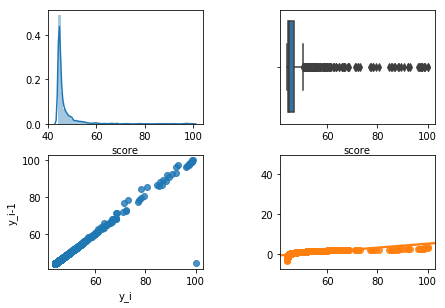

In [125]:
_multiplePlots(cwur_clean.score)

The overall scores for the CWUR dataset appears to have a heavy right-skewed normal distribution. The middle 50th percentile lies between 43 and 47, with multiple outliers past 47.

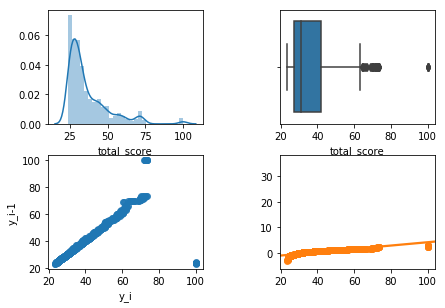

In [126]:
_multiplePlots(shanghai_clean.total_score)

The overall scores for the Shanghai dataset appears to have a right-skewed normal distribution. The middle 50th percentile lies between 25 and 60, with several outliers past 60.

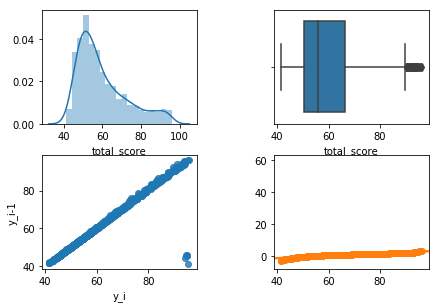

In [130]:
_multiplePlots(times_score_clean)

The overall scores for the Times dataset appears to have a right-skewed normal distribution. The middle 50th percentiles lies between 40 and 90, with several outliers past 90.

### Q2. For 10 Points: Using the Times data, look at the number of students (`num_students` column) for all universities in 2016.

* Plot the distribution using the `multiplePlots` function from class. What does it look like?
* Compare the mean and median. Are they similar or different, and why?
* Which school has the most students?

In [2]:
times_student_clean = times.dropna()
def multiplePlots(series):
    
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad = 0.4, w_pad = 4, h_pad = 1.0)

    # Histogram
    sns.distplot(series, ax = axs[0,0])
    
    # Lag plot code here
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current, lag, fit_reg = False, ax = axs[0,1])
    ax.set_ylabel('y_i-1')
    ax.set_xlabel("y_i")
    
    # QQ plot code here
    qntls, xr = stats.probplot(series, fit=False)
    hm = sns.regplot(xr,qntls, ax = axs[1,0])
    
    # Run Sequence doe here
    ax = sns.regplot(np.arange(len(series)), series, fit_reg = False, ax = axs[1,1])
    ax.set_ylim(0, series.max() + 1)
    ax.set_ylabel("val")
    ax.set_xlabel("i")

Mean: 23845.077053344623
Median: 20584.0
Max: 2413    Anadolu University
Name: university_name, dtype: object


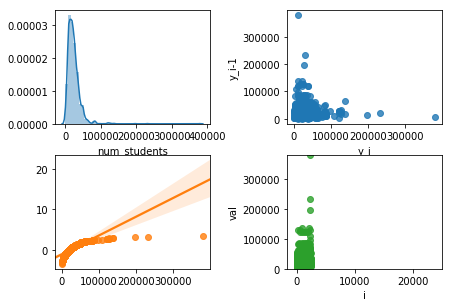

In [4]:
multiplePlots(times_student_clean.num_students)
print('Mean:', np.mean(times_student_clean.num_students))
print('Median:', np.median(times_student_clean.num_students))
print('Max:', times_student_clean.sort_values('num_students', ascending = False).head(1).university_name)

The multiple plots indicate that the number of students has a right-skewed normal distribution. As well, is not randomly distributed.

The mean and median are spread apart, being separated by about 3000 students. This means that there are outliers on the high end pulling the mean higher.

The university with the most students is Anadolu

### Q3. For 10 points: Using the Times data, compare the international outlook scores (`international` column) for universities in the US versus universities outside the US.

* Plot their distributions for 2011 and describe them. Identify their their mean and median.
* Repeat this for 2016. Has the result changed?

In [51]:
times_cleaned = times[times.international != '-'].copy()
times_cleaned['international'] = times_cleaned.international.astype('float64')

times_cleaned_us = times_cleaned[times_cleaned.country == 'United States of America'].copy()
times_cleaned_us_2011 = times_cleaned_us[times_cleaned_us.year == 2011].copy()
times_cleaned_us_2016 = times_cleaned_us[times_cleaned_us.year == 2016].copy()

times_cleaned_int = times_cleaned[times_cleaned.country != 'United States of America'].copy()
times_cleaned_int_2011 = times_cleaned_int[times_cleaned_int.year == 2011].copy()
times_cleaned_int_2016 = times_cleaned_int[times_cleaned_int.year == 2016].copy()

Mean US 2011: 42.231  |  Mean Int 2011: 61.503
Mean US 2016: 42.432  |  Mean Int 2016: 49.855

Median US 2011: 38.6  |  Median Int 2011: 63.2
Median US 2016: 40.2  |  Median Int 2016: 47.0


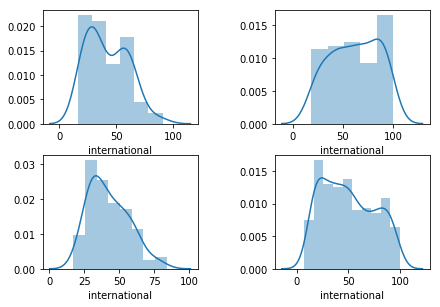

In [122]:
fig, axs  = plt.subplots(2,2)
plt.tight_layout(pad = 0.4, w_pad = 4, h_pad = 1.0)

sns.distplot(times_cleaned_us_2011.international, ax = axs[0,0])
sns.distplot(times_cleaned_int_2011.international, ax = axs[0,1])
sns.distplot(times_cleaned_us_2016.international, ax = axs[1,0])
sns.distplot(times_cleaned_int_2016.international, ax = axs[1,1])

print('Mean US 2011: %.3f' % np.mean(times_cleaned_us_2011.international), ' | ', 'Mean Int 2011: %.3f' % np.mean(times_cleaned_int_2011.international))
print('Mean US 2016: %.3f' % np.mean(times_cleaned_us_2016.international), ' | ', 'Mean Int 2016: %.3f' % np.mean(times_cleaned_int_2016.international))
print()
print('Median US 2011:', np.median(times_cleaned_us_2011.international), ' | ', 'Median Int 2011:', np.median(times_cleaned_int_2011.international))
print('Median US 2016:', np.median(times_cleaned_us_2016.international), ' | ', 'Median Int 2016:', np.median(times_cleaned_int_2016.international))

For universities in the United States, the mean and median scores between 2011 and 2016 did not change by much. The mean increased by about 0.2, while the median increased by about 2.

For universities outside the United States, the mean and median scores between 2011 and 2016 decreased by a good deal. The mean decreased by about 12, while the median decreased by 16.

Looking at the graphs, US universities had a local maximum at around 55 disappear between 2011 and 2016.

Looking at the graphs, non-US universities shifted from a left-skewed uniform distribution in 2011 to a right-skewed uniform distribution in 2016. A local maximum also appeared around 80 in 2016.

### Q4. For 10 Points: Using the data for the CWUR rankings, investigate how the rankings change over time.

* Which universities consistently appear in the rankings, and which aren't?
* Which universities are rising, falling, or stationary in rank over the years?
* Plot the results, and explain your answers

It might be more intuitive to compare the scores rather than the ranks directly. Feel free to do this if it's the case.

In [110]:
cwur_2012 = cwur[cwur.year == 2012].copy().head(10)
cwur_2013 = cwur[cwur.year == 2013].copy().head(10)
cwur_2014 = cwur[cwur.year == 2014].copy().head(10)
cwur_2015 = cwur[cwur.year == 2015].copy().head(10)

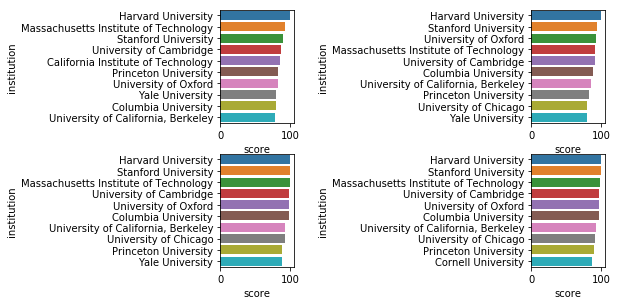

In [117]:
fig, axs  = plt.subplots(2,2)
plt.tight_layout(pad = 0.5, w_pad = 20, h_pad = 1.0)

sns.barplot(y = cwur_2012.institution, x = cwur_2012.score, orient = 'h', ax = axs[0,0])
sns.barplot(y = cwur_2013.institution, x = cwur_2013.score, orient = 'h', ax = axs[0,1])
sns.barplot(y = cwur_2014.institution, x = cwur_2014.score, orient = 'h', ax = axs[1,0])
sns.barplot(y = cwur_2015.institution, x = cwur_2015.score, orient = 'h', ax = axs[1,1])

(Use this space to explain your answers)

### Q5. For 15 Points: Using the education expenditure data, identify the nations that spent below the average of the OECD for Higher Education Institutions in 1995, but above the average in 2010.

* Sort the nations by difference between 1995 and 2010
* Plot the lag, and explain your answers.

In [159]:
edu_exp = pd.read_csv('data/world-university-rankings/education_expenditure_supplementary_data.csv', index_col = 0).dropna()
edu_exp.loc['OECD Average']

,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
country,,,,,,,,
OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.3
OECD Average,Elementary and Secondary Institutions,Public,3.5,3.4,3.5,3.7,3.7,3.6
OECD Average,Higher Education Institutions,Public,0.9,1.0,1.0,1.1,1.1,1.1


(Use this space to explain your answers)

### Q6. For 15 Points: Using the Times ranking, look at how the Female : Male ratio (`female_male_ratio` column) changes over time.

What were the distributions like in the year 2012 and 2015? How have these distributions changed?

You may want to convert the column values to an easier-to-understand measure, such as a percentage or the ratio of female students (the first numeric value in the ratio entry).

In [172]:
_times = times[times.female_male_ratio != '-'].copy().dropna()

def convert_ratio(row):
    row['female_male_ratio'] = int(row['female_male_ratio'][0:2])/100
    
    return row['female_male_ratio']

_times['female_male_ratio'] = _times.apply(convert_ratio, axis = 1)

(Use this space to explain your answers)

### *Bonus* – For 5 Points: Which, if any, of the rankings from the Kaggle data set support the claims made in [this Times Higher Education article on public schools](https://www.timeshighereducation.com/student/best-universities/best-public-universities-united-states)?

Justify your claim with specific examples or data.

In [ ]:
# put your code here

(Use this space to explain your answers)